# Mincer Equation

In here, I attempt to confirm if a person's monthly income can be predicted using their years of schooling and experience (also known as Mincer equation in Labour Economics) using the OLS method and data from the EMNV 2014 (Encuesta de Medición del Nivel de Vida) in Nicaragua. Also, I include the categorical variable "gender" as a dummy [1=woman, 0=man] for two main reasons: a) to determine if there's a statistically significant difference between average income for men and women; b) to have it interacting with the variable "education" in order to prove if there are differences between an additional year of schooling for men vs women.

Even though this is a simple approach to the Mincer equation (starting by assuming that returns to education are linear, i.e., one additional year of high school yields the same returns as one additional year of college), I am confident that it can be very powerful in determining both the returns to education in general, and the differences on income -if there any- between men and women

## Data importing 

In [1]:
# importing all related packages
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# importing the data from .csv file
df = pd.read_csv("C:/Users/miran/Desktop/poblacion2.csv", index_col=0)

As you can see, this dataset has several columns, many of which will not be used for the analysis. For that reason, I'm only keeping the ones that matter (i.e., education, income, age, gender, and some other variables that I will explain later on).

If you need further information about each variable (column), please refer to the Official Survey.

In [3]:
df

,DOMINIO4,I06,S2P00,S2P2A,S2P2B,S2P3,MIEMBRO,S2P4,S2P5,S2P6A,...,S6IP1B,S6IP2,S6IP3,S6IP4A,S6IP4B,S6IP5,S6IP6,S6IP7,Peso2,Peso3
I00,,,,,,,,,,,,,,,,,,,,,
101,1,1,1,63,,3,1,1,2,20,...,,,4,1,,,,,26.768870,80.306609
101,1,1,2,22,,3,1,3,1,29,...,,,5,1,,,,,26.768870,80.306609
101,1,1,3,1,,3,1,5,1,12,...,11,2014,6,,,,,,26.768870,80.306609
201,1,1,1,31,,3,1,1,1,30,...,,,5,1,,,,,26.768870,133.844349
201,1,1,2,26,,3,1,2,2,19,...,,,5,1,,,,,26.768870,133.844349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757001,4,2,1,31,,3,1,1,1,14,...,8520,,5,1,,,,,501.353752,2506.768759
757001,4,2,2,34,,3,1,2,2,23,...,,,5,1,,,,,501.353752,2506.768759
757001,4,2,3,13,,3,1,3,2,26,...,,,3,1,,,,,501.353752,2506.768759


## Data Wrangling

In [4]:
# keeping only the variables that will be of use throughout the analysis
df = df[['S2P2A', 'MIEMBRO', 'S2P5', 'S5P19A', 'S5P19B', 'S5P35A', 'S5P35B', 'S4P12A', 'S4P12B']]

In [5]:
df.head()

,S2P2A,MIEMBRO,S2P5,S5P19A,S5P19B,S5P35A,S5P35B,S4P12A,S4P12B
I00,,,,,,,,,
101,63,1,2,,,,,0,0
101,22,1,1,500,2,,,0,0
101,1,1,1,,,,,,
201,31,1,1,,,,,3,4
201,26,1,2,,,,,4,5


Now, I only have 9 variables left

_S2P2A_ --- Age

_MIEMBRO_ --- If the person was a member of the household at the moment of the survey

_S2P5_ --- Gender (It originally takes the values 1=Man 2=Woman, but I will change that later)

_S5P19A_ --- Income from first job

_S5P19B_ --- Pay frequency (categorical variable, it can be weekly, biweekly, monthly, etc.)

_S5P35A_ --- Income from second job (if any)

_S5P35B_ --- Pay frequency (categorical variable, it can be weekly, biweekly, monthly, etc.)

_S4P12A_ --- Last grade of schooling approved (cat. variable, it can be middle school, college, etc.)

_S4P12B_ --- Last level of schooling approved, based on the last grade

### Age

In [6]:
# Checking the type of "Age"
df['S2P2A'].dtypes

dtype('int64')

In [7]:
# Renaming it
df.rename(columns={'S2P2A': 'edad'}, inplace=True)

In [8]:
df.head()

,edad,MIEMBRO,S2P5,S5P19A,S5P19B,S5P35A,S5P35B,S4P12A,S4P12B
I00,,,,,,,,,
101,63,1,2,,,,,0,0
101,22,1,1,500,2,,,0,0
101,1,1,1,,,,,,
201,31,1,1,,,,,3,4
201,26,1,2,,,,,4,5


In [9]:
# Removing all observations where the person said they do not belong to the household (MIEMBRO == 2)
df.drop(df[df.MIEMBRO == 2].index, inplace=True)

In [10]:
df.head()

,edad,MIEMBRO,S2P5,S5P19A,S5P19B,S5P35A,S5P35B,S4P12A,S4P12B
I00,,,,,,,,,
101,63,1,2,,,,,0,0
101,22,1,1,500,2,,,0,0
101,1,1,1,,,,,,
201,31,1,1,,,,,3,4
201,26,1,2,,,,,4,5


### Gender

In [11]:
# Changing the type of the Gender variable to category
df['S2P5'] = df['S2P5'].astype('category')

In [12]:
# According to this, there are only two categories (please refer to the official survey) 
df['S2P5']

I00
101       2
101       1
101       1
201       1
201       2
         ..
757001    1
757001    2
757001    2
757001    2
757001    2
Name: S2P5, Length: 29176, dtype: category
Categories (2, object): ['1', '2']

In [13]:
# Renaming the categories so that 1=Man and 2=Woman
df['S2P5'].cat.categories = ['hombre', 'mujer']

In [14]:
df['S2P5'].value_counts()

mujer     15170
hombre    14006
Name: S2P5, dtype: int64

In [15]:
# Renaming the variable
df.rename(columns={'S2P5': 'sexo'},inplace=True)

In [16]:
df.head()

,edad,MIEMBRO,sexo,S5P19A,S5P19B,S5P35A,S5P35B,S4P12A,S4P12B
I00,,,,,,,,,
101,63,1,mujer,,,,,0,0
101,22,1,hombre,500,2,,,0,0
101,1,1,hombre,,,,,,
201,31,1,hombre,,,,,3,4
201,26,1,mujer,,,,,4,5


### Income from the first job

In [17]:
# Checking the type of the income variable
df['S5P19A'].dtypes

dtype('O')

In [18]:
# Changing its type to numeric
df['S5P19A'] = pd.to_numeric(df['S5P19A'], errors='coerce')

In [19]:
# Renaming the variable
df.rename(columns={'S5P19A': 'ingresos1'}, inplace=True)

In [20]:
df.head()

,edad,MIEMBRO,sexo,ingresos1,S5P19B,S5P35A,S5P35B,S4P12A,S4P12B
I00,,,,,,,,,
101,63,1,mujer,NaN,,,,0,0
101,22,1,hombre,500.0,2,,,0,0
101,1,1,hombre,NaN,,,,,
201,31,1,hombre,NaN,,,,3,4
201,26,1,mujer,NaN,,,,4,5


### Pay Frequency

In [21]:
# Checking the type of the pay frequency variable
df['S5P19B'].dtypes

dtype('O')

In [22]:
# Renaming the variable
df.rename(columns={'S5P19B': 'frecuencia'}, inplace=True)

In [23]:
# Making it a categorical variable
df['frecuencia'] = df['frecuencia'].astype('category')

In [24]:
df['frecuencia']

I00
101        
101       2
101        
201        
201        
         ..
757001     
757001     
757001     
757001     
757001     
Name: frecuencia, Length: 29176, dtype: category
Categories (11, object): [' ', '1', '2', '3', ..., '7', '8', '98', '99']

In [25]:
# Creating categories (refer to the official survey)
df['frecuencia'].cat.categories = ['', 'diario', 'semanal', 'catorcenal', 'quincenal', 'mensual', 'trimestral', 'semestral', 'anual', 'ns', 'ignorado']

In [26]:
df['frecuencia']

I00
101              
101       semanal
101              
201              
201              
           ...   
757001           
757001           
757001           
757001           
757001           
Name: frecuencia, Length: 29176, dtype: category
Categories (11, object): ['', 'diario', 'semanal', 'catorcenal', ..., 'semestral', 'anual', 'ns', 'ignorado']

In [27]:
# Removing extra categories
df['frecuencia'] = df['frecuencia'].cat.remove_categories('')

In [28]:
df['frecuencia'] = df['frecuencia'].cat.remove_categories('ns')

In [29]:
df['frecuencia'] = df['frecuencia'].cat.remove_categories('ignorado')

In [30]:
# Now I only have 8 categories left
df['frecuencia']

I00
101           NaN
101       semanal
101           NaN
201           NaN
201           NaN
           ...   
757001        NaN
757001        NaN
757001        NaN
757001        NaN
757001        NaN
Name: frecuencia, Length: 29176, dtype: category
Categories (8, object): ['diario', 'semanal', 'catorcenal', 'quincenal', 'mensual', 'trimestral', 'semestral', 'anual']

In [31]:
df['frecuencia'].value_counts()

mensual       3899
semanal       1385
quincenal     1310
diario         543
catorcenal     216
trimestral       5
semestral        1
anual            1
Name: frecuencia, dtype: int64

### Monthly salary (1st job only)

In [32]:
# Generating new variable called "salario", which will be the income from the first job
df['salario'] = ''

Now, since there are 8 different frequencies for payment, I need to convert all of them to a monthly frequency.

To do that, I use basic arithmetic and the np.where function from the NumPy package. So, if a person reported to have their income paid every week, I will multiply their income by 4 and assign that value to the 'salario' variable. If someone reported having it paid biweekly, I will multiply that income by 2, and so on.

In [33]:
df['salario'] = np.where(df['frecuencia'] == 'mensual', df['ingresos1']*1, df['salario'])

In [34]:
df[df['frecuencia'] == 'mensual']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
301,37,1,mujer,5222.0,mensual,,,7,6,5222.0
801,57,1,hombre,3897.0,mensual,,,3,6,3897.0
1201,67,1,hombre,3500.0,mensual,,,3,6,3500.0
2101,50,1,hombre,10000.0,mensual,,,9,5,10000.0
2101,46,1,mujer,6200.0,mensual,,,8,2,6200.0
...,...,...,...,...,...,...,...,...,...,...
755201,14,1,hombre,2000.0,mensual,50,1,3,3,2000.0
755501,26,1,mujer,600.0,mensual,,,4,3,600.0
755701,48,1,mujer,1000.0,mensual,,,3,5,1000.0


In [35]:
# When income is paid weekly, multiply by 4
df['salario'] = np.where(df['frecuencia'] == 'semanal', df['ingresos1']*4, df['salario'])

In [36]:
df[df['frecuencia'] == 'semanal']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
101,22,1,hombre,500.0,semanal,,,0,0,2000.0
501,22,1,hombre,500.0,semanal,,,4,4,2000.0
601,30,1,hombre,2800.0,semanal,,,4,3,11200.0
1001,24,1,hombre,600.0,semanal,,,3,2,2400.0
1601,23,1,mujer,600.0,semanal,,,3,6,2400.0
...,...,...,...,...,...,...,...,...,...,...
750001,19,1,hombre,700.0,semanal,,,0,0,2800.0
750001,15,1,hombre,700.0,semanal,,,0,0,2800.0
750501,23,1,hombre,500.0,semanal,,,9,4,2000.0


In [37]:
# Biweekly, multiply by 2
df['salario'] = np.where(df['frecuencia'] == 'catorcenal', df['ingresos1']*2, df['salario'])

In [38]:
df[df['frecuencia']=='catorcenal']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
6202,34,1,mujer,1800.0,catorcenal,,,4,5,3600.0
7101,29,1,hombre,3000.0,catorcenal,,,4,3,6000.0
8301,24,1,hombre,3800.0,catorcenal,,,3,6,7600.0
8301,18,1,mujer,3400.0,catorcenal,,,3,6,6800.0
10301,35,1,hombre,700.0,catorcenal,,,4,2,1400.0
...,...,...,...,...,...,...,...,...,...,...
755401,20,1,hombre,1500.0,catorcenal,,,0,0,3000.0
755401,28,1,hombre,1500.0,catorcenal,,,0,0,3000.0
755401,20,1,hombre,1400.0,catorcenal,,,3,1,2800.0


In [39]:
df['salario'] = np.where(df['frecuencia'] == 'quincenal', df['ingresos1']*2, df['salario'])

In [40]:
df[df['frecuencia'] == 'quincenal']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
2901,57,1,hombre,3000.0,quincenal,,,4,5,6000.0
3301,25,1,hombre,1500.0,quincenal,,,4,3,3000.0
3601,65,1,hombre,300.0,quincenal,,,0,0,600.0
4601,42,1,hombre,2000.0,quincenal,,,3,6,4000.0
6501,59,1,mujer,600.0,quincenal,,,3,6,1200.0
...,...,...,...,...,...,...,...,...,...,...
751301,37,1,hombre,3000.0,quincenal,,,4,3,6000.0
751801,23,1,mujer,700.0,quincenal,,,4,1,1400.0
751801,23,1,hombre,1900.0,quincenal,,,3,6,3800.0


In [41]:
# Daily, multiply by 30 days of the month
df['salario'] = np.where(df['frecuencia'] == 'diario', df['ingresos1']*30, df['salario'])

In [42]:
df[df['frecuencia'] == 'diario']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
301,39,1,hombre,150.0,diario,,,3,6,4500.0
901,56,1,mujer,150.0,diario,,,3,2,4500.0
1101,63,1,hombre,230.0,diario,,,3,6,6900.0
1101,16,1,hombre,115.0,diario,,,3,6,3450.0
1501,22,1,hombre,450.0,diario,,,4,4,13500.0
...,...,...,...,...,...,...,...,...,...,...
756301,48,1,hombre,140.0,diario,,,0,0,4200.0
756301,18,1,hombre,140.0,diario,,,3,4,4200.0
756301,15,1,hombre,140.0,diario,,,3,5,4200.0


In [43]:
# Every trimester, divide by 3
df['salario'] = np.where(df['frecuencia'] == 'trimestral', df['ingresos1']/3, df['salario'])

In [44]:
df[df['frecuencia'] == 'trimestral']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
402101,52,1,hombre,2294.0,trimestral,,,3,6,764.666667
533101,19,1,hombre,1000.0,trimestral,,,3,6,333.333333
615101,51,1,mujer,3000.0,trimestral,,,4,5,1000.0
725601,61,1,hombre,6000.0,trimestral,,,3,3,2000.0
733601,24,1,mujer,700.0,trimestral,,,4,5,233.333333


In [45]:
# Every semester, divide by 6
df['salario'] = np.where(df['frecuencia'] == 'semestral', df['ingresos1']/6, df['salario'])

In [46]:
df[df['frecuencia'] == 'semestral']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
533601,22,1,hombre,6000.0,semestral,,,3,3,1000.0


In [47]:
# Finally, if it's paid yearly, divide by 12
df['salario'] = np.where(df['frecuencia'] == 'anual', df['ingresos1']/12, df['salario'])

In [48]:
df[df['frecuencia'] == 'anual']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
557201,29,1,mujer,1260.0,anual,,,3,6,105.0


So far, this is what we have

In [49]:
df.head()

,edad,MIEMBRO,sexo,ingresos1,frecuencia,S5P35A,S5P35B,S4P12A,S4P12B,salario
I00,,,,,,,,,,
101,63,1,mujer,NaN,NaN,,,0,0,
101,22,1,hombre,500.0,semanal,,,0,0,2000.0
101,1,1,hombre,NaN,NaN,,,,,
201,31,1,hombre,NaN,NaN,,,3,4,
201,26,1,mujer,NaN,NaN,,,4,5,


In [50]:
df['salario'].dtypes

dtype('O')

In [51]:
# Now, I change the type of the newly created "salario" to numeric
df['salario'] = pd.to_numeric(df['salario'])

In [52]:
# Mean monthly income from the first job is C$5,487
df['salario'].mean()

5487.53455615942

### Income from second job

Now, I repeat the same process all over again for the income corresponding to the second job. I won't dig deeper here since it's exactly the same data manipulation as before.

In [53]:
df['S5P35A'].dtypes

dtype('O')

In [54]:
df['S5P35A'] = pd.to_numeric(df['S5P35A'], errors='coerce')

In [55]:
df.rename(columns={'S5P35A': 'ingresos2'}, inplace=True)

### Pay frequency

In [56]:
df['S5P35B'] = df['S5P35B'].astype('category')

In [57]:
df['S5P35B']

I00
101        
101        
101        
201        
201        
         ..
757001     
757001     
757001     
757001     
757001     
Name: S5P35B, Length: 29176, dtype: category
Categories (7, object): [' ', '1', '2', '3', '4', '5', '6']

In [58]:
df.rename(columns={'S5P35B': 'frecuencia2'},inplace=True)

In [59]:
# Dando nombre a las categorias
df['frecuencia2'].cat.categories = ['', 'diario', 'semanal', 'catorcenal', 'quincenal', 'mensual', 'trimestral']

In [60]:
# Eliminando categoria vacia
df['frecuencia2'] = df['frecuencia2'].cat.remove_categories('')

In [61]:
df['frecuencia2'].value_counts()

mensual       115
semanal        75
diario         62
quincenal      14
catorcenal      7
trimestral      3
Name: frecuencia2, dtype: int64

### Monthly income from second job

In [62]:
df['salario2'] = ''

In [63]:
df['salario2'] = pd.to_numeric(df['salario2'])

In [64]:
df['salario2'] = np.where(df['frecuencia2'] == 'diario', df['ingresos2']*30, df['salario2'])

In [65]:
df[df['frecuencia2'] == 'diario']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,S4P12A,S4P12B,salario,salario2
I00,,,,,,,,,,,
36801,19,1,hombre,1700.0,quincenal,100.0,diario,0,0,3400.0,3000.0
175902,33,1,mujer,3200.0,quincenal,190.0,diario,4,5,6400.0,5700.0
256901,24,1,hombre,NaN,NaN,300.0,diario,4,1,NaN,9000.0
279101,25,1,hombre,NaN,NaN,300.0,diario,4,5,NaN,9000.0
320201,18,1,hombre,2550.0,mensual,100.0,diario,4,5,2550.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...
753801,49,1,hombre,NaN,NaN,100.0,diario,3,5,NaN,3000.0
754001,25,1,hombre,NaN,NaN,150.0,diario,4,3,NaN,4500.0
755201,21,1,hombre,3000.0,mensual,50.0,diario,3,4,3000.0,1500.0


In [66]:
df['salario2'] = np.where(df['frecuencia2'] == 'semanal', df['ingresos2']*4, df['salario2'])

In [67]:
df[df['frecuencia2'] == 'semanal']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,S4P12A,S4P12B,salario,salario2
I00,,,,,,,,,,,
33701,41,1,mujer,80.0,diario,100.0,semanal,3,2,2400.0,400.0
76401,22,1,hombre,800.0,semanal,120.0,semanal,4,5,3200.0,480.0
78201,47,1,hombre,NaN,NaN,1027.0,semanal,3,1,NaN,4108.0
108901,48,1,hombre,2000.0,quincenal,1000.0,semanal,4,1,4000.0,4000.0
124903,22,1,hombre,3500.0,mensual,5000.0,semanal,9,2,3500.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...
716901,34,1,hombre,NaN,NaN,600.0,semanal,3,6,NaN,2400.0
720101,45,1,hombre,700.0,semanal,420.0,semanal,0,0,2800.0,1680.0
739601,22,1,hombre,NaN,NaN,400.0,semanal,3,6,NaN,1600.0


In [68]:
df['salario2'] = np.where(df['frecuencia2'] == 'catorcenal', df['ingresos2']*2, df['salario2'])

In [69]:
df['salario2'] = np.where(df['frecuencia2'] == 'quincenal', df['ingresos2']*2, df['salario2'])

In [70]:
df[(df['frecuencia2'] == 'catorcenal') | (df['frecuencia2'] == 'quincenal')]

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,S4P12A,S4P12B,salario,salario2
I00,,,,,,,,,,,
24701,51,1,mujer,NaN,NaN,750.0,catorcenal,4,5,NaN,1500.0
37001,62,1,hombre,1000.0,semanal,180.0,quincenal,3,6,4000.0,360.0
57201,23,1,hombre,4200.0,mensual,1200.0,quincenal,3,4,4200.0,2400.0
137401,42,1,mujer,NaN,NaN,1300.0,quincenal,3,6,NaN,2600.0
167001,53,1,mujer,1800.0,quincenal,500.0,quincenal,4,4,3600.0,1000.0
177401,21,1,hombre,1500.0,semanal,1800.0,catorcenal,3,5,6000.0,3600.0
190601,48,1,mujer,NaN,NaN,1000.0,catorcenal,4,5,NaN,2000.0
286201,22,1,hombre,1200.0,semanal,1000.0,catorcenal,3,6,4800.0,2000.0
334501,57,1,mujer,7157.0,mensual,3170.0,catorcenal,9,5,7157.0,6340.0


In [71]:
df['salario2'] = np.where(df['frecuencia2'] == 'trimestral', df['ingresos2']/3, df['salario2'])

In [72]:
df[df['frecuencia2'] == 'trimestral']

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,S4P12A,S4P12B,salario,salario2
I00,,,,,,,,,,,
28401,48,1,mujer,10400.0,mensual,10000.0,trimestral,9,5,10400.0,3333.333333
617201,48,1,hombre,19000.0,mensual,4000.0,trimestral,9,5,19000.0,1333.333333
617201,37,1,mujer,25000.0,mensual,3900.0,trimestral,9,5,25000.0,1300.000000


In [73]:
df.head()

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,S4P12A,S4P12B,salario,salario2
I00,,,,,,,,,,,
101,63,1,mujer,NaN,NaN,NaN,NaN,0,0,NaN,NaN
101,22,1,hombre,500.0,semanal,NaN,NaN,0,0,2000.0,NaN
101,1,1,hombre,NaN,NaN,NaN,NaN,,,NaN,NaN
201,31,1,hombre,NaN,NaN,NaN,NaN,3,4,NaN,NaN
201,26,1,mujer,NaN,NaN,NaN,NaN,4,5,NaN,NaN


### Total Income

Once I have created a variable for the income of both the first and second job (if any), I need to create a new variable that will be the sum of BOTH, in order to have a total income.

In [74]:
# Creating new column
df['sal_total'] = ''

In [75]:
# Assigning a numeric type
df['sal_total'] = pd.to_numeric(df['sal_total'])

In [76]:
df['sal_total'].dtypes

dtype('float64')

In [77]:
# Adding income1 + income2. In case there are NaNs, just fill them with zeros.
df['sal_total'] = df.salario.fillna(0) + df.salario2.fillna(0)

In [78]:
df.head()

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,S4P12A,S4P12B,salario,salario2,sal_total
I00,,,,,,,,,,,,
101,63,1,mujer,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.0
101,22,1,hombre,500.0,semanal,NaN,NaN,0,0,2000.0,NaN,2000.0
101,1,1,hombre,NaN,NaN,NaN,NaN,,,NaN,NaN,0.0
201,31,1,hombre,NaN,NaN,NaN,NaN,3,4,NaN,NaN,0.0
201,26,1,mujer,NaN,NaN,NaN,NaN,4,5,NaN,NaN,0.0


### Years of schooling

Now, I move on to manipulating the variable for years of schooling.

In [79]:
# Checking the type
df['S4P12A'].dtypes

dtype('O')

In [80]:
# Changing it to categorical
df['S4P12A'] = df['S4P12A'].astype('category')

In [81]:
print(df['S4P12A'].cat.categories)

Index([' ', '0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8',
       '9'],
      dtype='object')


If you check out the survey (question S4P12A), you'll see that it asks "What's your last level of education approved?". Hence, this is a categorical variable.

In [82]:
# Creating categories
df['S4P12A'].cat.categories = ['', 'Ninguno', 'Preescolar', 'Maestría', "Doctorado", "Educación especial", "Educación de adultos", 
                              "Primaria", "Secundaria", "Técnico básico", "Técnico medio", "Formación docente", "Técnico superior", 
                              "Universitario"]

In [83]:
print(df['S4P12A'].cat.categories)

Index(['', 'Ninguno', 'Preescolar', 'Maestría', 'Doctorado',
       'Educación especial', 'Educación de adultos', 'Primaria', 'Secundaria',
       'Técnico básico', 'Técnico medio', 'Formación docente',
       'Técnico superior', 'Universitario'],
      dtype='object')


In [84]:
# Changing the name to edu1
df.rename(columns={'S4P12A': 'edu1'}, inplace=True)

In [85]:
# Eliminating empty category
df['edu1'] = df['edu1'].cat.remove_categories('')

In [86]:
df.groupby('edu1').size()

edu1
Ninguno                 2306
Preescolar               808
Maestría                  96
Doctorado                 10
Educación especial        32
Educación de adultos     174
Primaria                9658
Secundaria              8355
Técnico básico           137
Técnico medio            360
Formación docente        252
Técnico superior         123
Universitario           3285
dtype: int64

On the other hand, question S4P12B asks what was the last GRADE the person approved. The difference between this question and the previous one will be clearer later on.

In [87]:
# Renaming the variable
df.rename(columns={'S4P12B': 'edu2'}, inplace=True)

In [88]:
# Converting it to numeric
df['edu2'] = pd.to_numeric(df['edu2'], errors='coerce')

In [89]:
df['edu2'].dtypes

dtype('float64')

In [90]:
df.loc[:, 'edu2']

I00
101       0.0
101       0.0
101       NaN
201       4.0
201       5.0
         ... 
757001    6.0
757001    0.0
757001    3.0
757001    1.0
757001    3.0
Name: edu2, Length: 29176, dtype: float64

As you can see below, for example, the first individual from household 201 went to middle school and his/her last grade approved was 4th grade. The person below that, went to high school and his/her last grade approved was 12th grade (5to año under the Nicaraguan school system).

In [91]:
df.loc[:, ['edu1', 'edu2']]

,edu1,edu2
I00,,
101,Ninguno,0.0
101,Ninguno,0.0
101,NaN,NaN
201,Primaria,4.0
201,Secundaria,5.0
...,...,...
757001,Primaria,6.0
757001,Ninguno,0.0
757001,Primaria,3.0


In [92]:
df.head()

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,edu1,edu2,salario,salario2,sal_total
I00,,,,,,,,,,,,
101,63,1,mujer,NaN,NaN,NaN,NaN,Ninguno,0.0,NaN,NaN,0.0
101,22,1,hombre,500.0,semanal,NaN,NaN,Ninguno,0.0,2000.0,NaN,2000.0
101,1,1,hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
201,31,1,hombre,NaN,NaN,NaN,NaN,Primaria,4.0,NaN,NaN,0.0
201,26,1,mujer,NaN,NaN,NaN,NaN,Secundaria,5.0,NaN,NaN,0.0


Once I have both the last grade AND last level approved, it is now possible to calculate years of schooling for every individual. In order to do that, I first create a new variable called "edu3".

In [93]:
# Generating new variable
df['edu3'] = ''

In [94]:
# Making it numeric
df['edu3'] = pd.to_numeric(df['edu3'])

In [95]:
df['edu3'].dtypes

dtype('float64')

In [96]:
# Printing the categories of "edu1" just to have them close while writing the following code
print(df['edu1'].cat.categories)

Index(['Ninguno', 'Preescolar', 'Maestría', 'Doctorado', 'Educación especial',
       'Educación de adultos', 'Primaria', 'Secundaria', 'Técnico básico',
       'Técnico medio', 'Formación docente', 'Técnico superior',
       'Universitario'],
      dtype='object')


The code below is highly important. Basically if a person's last grade was Secundaria (high school), we assume that person has at least 6 years of schooling (from middle and elementary school). On the other hand, if that person's last grade was Universitario (college), we assume they have at least 11 years of schooling (6 from middle/elementary + 5 from high school = 11), and so on.

In [96]:
def condition(s):
    if (s['edu1'] == "Ninguno") or (s['edu1'] == 'Preescolar') or (s['edu1'] == 'Educación de adultos') or (s['edu1'] == 'Primaria') or (s['edu1'] == "Educación especial"):
        return 0
    elif s['edu1'] == "Secundaria":
        return 6
    elif s['edu1'] == 'Técnico básico':
        return 9
    elif (s['edu1'] == 'Técnico medio') or (s['edu1'] == 'Formación docente') or (s['edu1'] == 'Técnico superior') or (s['edu1'] == 'Universitario'):
        return 11
    elif s['edu1'] == 'Maestría':
        return 16
    elif s['edu1'] == 'Doctorado':
        return 18
    else:
        pass

In [97]:
# Now I apply the function above to the dataset
df['edu3'] = df.apply(condition, axis=1)

In [98]:
df.loc[:, ['edu1', 'edu3']]

,edu1,edu3
I00,,
101,Ninguno,0.0
101,Ninguno,0.0
101,NaN,NaN
201,Primaria,0.0
201,Secundaria,6.0
...,...,...
757001,Primaria,0.0
757001,Ninguno,0.0
757001,Primaria,0.0


In [99]:
df[['edu1','edu3']] [df['edu1'] == 'Doctorado']

,edu1,edu3
I00,,
17101,Doctorado,18.0
101001,Doctorado,18.0
117801,Doctorado,18.0
126701,Doctorado,18.0
148801,Doctorado,18.0
188201,Doctorado,18.0
272601,Doctorado,18.0
307201,Doctorado,18.0
434901,Doctorado,18.0


In [100]:
# Generating a new variable called "educ" which represents years of schooling. It is the sum of "edu2" + "edu3", based on...
# last grade and level approved
df['educ'] = df.edu2.fillna(0) + df.edu3.fillna(0)

This will all be clearer now, I hope. Let's take a look at the second person from household 201 (row 4 in Python). That person's last GRADE was high school (edu1), hence, edu3 is equal to 6, because in order for that person to have reached high school, they must have gone through Primaria (which is 6 years long in Nicaragua). In consequence, that person's years of schooling is equal to 11: the 6 years of Primaria (edu3) plus the 5 years of high school (edu2). 

In [101]:
df.loc[:, ['edu1', 'edu2', 'edu3', 'educ']]

,edu1,edu2,edu3,educ
I00,,,,
101,Ninguno,0.0,0.0,0.0
101,Ninguno,0.0,0.0,0.0
101,NaN,NaN,NaN,0.0
201,Primaria,4.0,0.0,4.0
201,Secundaria,5.0,6.0,11.0
...,...,...,...,...
757001,Primaria,6.0,0.0,6.0
757001,Ninguno,0.0,0.0,0.0
757001,Primaria,3.0,0.0,3.0


### Potential experience

In [102]:
# Generating potential experience variable
df['exper'] = df['edad'].fillna(0) - df['educ'].fillna(0) - 6

In [103]:
# Generating the square of the potential experience (marginal diminishing returns)
df['expersq'] = df['exper'] ** 2

In [104]:
df.head()

,edad,MIEMBRO,sexo,ingresos1,frecuencia,ingresos2,frecuencia2,edu1,edu2,salario,salario2,sal_total,edu3,educ,exper,expersq
I00,,,,,,,,,,,,,,,,
101,63,1,mujer,NaN,NaN,NaN,NaN,Ninguno,0.0,NaN,NaN,0.0,0.0,0.0,57.0,3249.0
101,22,1,hombre,500.0,semanal,NaN,NaN,Ninguno,0.0,2000.0,NaN,2000.0,0.0,0.0,16.0,256.0
101,1,1,hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,-5.0,25.0
201,31,1,hombre,NaN,NaN,NaN,NaN,Primaria,4.0,NaN,NaN,0.0,0.0,4.0,21.0,441.0
201,26,1,mujer,NaN,NaN,NaN,NaN,Secundaria,5.0,NaN,NaN,0.0,6.0,11.0,9.0,81.0


### Natural logarithm of total income

Before transforming the income variable to logarithm, I first have to remove all zeros. I use the replace function to have them all replaced with NaNs.

In [105]:
df['sal_total'] = df['sal_total'].replace(0, np.nan)

In [106]:
df['ln_sal_total'] = np.log(df['sal_total'])

In [107]:
# It would look something like this...
df.loc[:, ['sal_total', 'ln_sal_total']].head(15)

,sal_total,ln_sal_total
I00,,
101,NaN,NaN
101,2000.0,7.600902
101,NaN,NaN
201,NaN,NaN
201,NaN,NaN
201,NaN,NaN
201,NaN,NaN
201,NaN,NaN
301,4500.0,8.411833


## Linear Regression: Mincer Equation

We're officially done with the data wrangling. It is time for the estimation of the model. I'm using the OLS method as mentioned at the beginning of this notebook, with the natural logarithm of monthly income as the dependent variable, with 4 regressors: 1) gender as a dummy variable (to see if there are differences in average monthly income between men and women, being MEN the base group); 2) education, to determine the returns to education for men only, since they are the base group; 3) gender AND education, to determine if there's a difference in the returns to education based on gender; 3) experience; 4) experience squared, which in the case of a negative sign, will mean that it has marginal diminishing returns.

In [108]:
# Estimating the model
model = smf.ols("ln_sal_total ~ sexo + sexo*educ + exper + expersq", data=df).fit()

### Interpretation

Below you can find a summary of the model and results. Although the R-squared is relatively low (the changes in the independent variables explain around 30% of the changes in y), it's better to look at the F-statistic, which since it has a p-value of 0, **we can conclude that all regressors in the model are jointly statistically significant at any level**. 

When it comes to the variables individually, they are also all significant. One thing I would like to point out, though, is the magnitude of the coefficient for women (sexo T.mujer). Since the base group for the dummy variable are men, this result can be interpreted as saying that **women have an average monthly income that is 53% less than that of men**, and, since I've controlled for other factors like education and experience, it is possible to affirm that this difference in income is related to gender and subjective factors not included in this regression (gender wage gap). 

Nevertheless, despite men having positive returns to education (6.97% increase in income for each additional year of schooling), **women actually have a 2.37% higher return**, so, overall, **the returns to education for women are 9.37% (0.0697 + 0.0237)**. This implies that, even though women with the same level of education and experience earn on average much less than men, each additional year of schooling has higher returns on income for women than men.

Finally, experience is positively correlated with a higher monthly income (3.2% for one more year of experience), but, **at some point, an additional year of experience has negative returns on income**. According to Wooldridge (2016), this can be calculated as:

$ x* = \hat{\beta}_{exper} / 2(\hat{\beta}_{exper^2}) $

Plugging in the values, we have 0.0320/2(0.0004) = 40. So, after 40 years of experience, every additional year has negative effects on income. However, since the average years of experience for this sample is almost 16, we can safely ignore this negative effect since it is too high (only a few people in this sample actually have more than 40 years of experience).

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ln_sal_total   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     616.8
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:14:34   Log-Likelihood:                -6308.6
No. Observations:                7441   AIC:                         1.263e+04
Df Residuals:                    7435   BIC:                         1.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.4539      0.025    299.440      0.000       7.405       7.503
sexo[T.mujer]         -0.5300      0.032    -16.702      0.000      -0.592      -0.468
educ                   0.0697      0.002     37.539      0.000       0.066       0.073
sexo[T.mujer]:educ     0.0237      0.003      8.186      0.000       0.018       0.029
exper                  0.0320      0.001     21.900      0.000       0.029       0.035
expersq               -0.0004   2.76e-05    -15.301      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      737.392   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3193.955
Skew:                          -0.407   Prob(JB):                         0.00
Kurtosis:                       6.105   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluating the model

Once we have analyzed the results of each variable and their statistical significance and effects on the dependent variable, it's necessary to assess how well this model is specified.

You can safely ignore the code below. It's a class that I will use later to run some diagnostics on the model. The code does not belong to me, instead, it was taken from:
https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

In [110]:
import statsmodels
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

First, I would like the reader to focus on the graph at the bottom left corner, the Partial regression plot. As you can clearly see, there's a positive linear relationship between monthly income and education. This means that, just as the results above confirmed, **the higher a person's years of schooling, the higher their income will be** (keeping everything else constant).

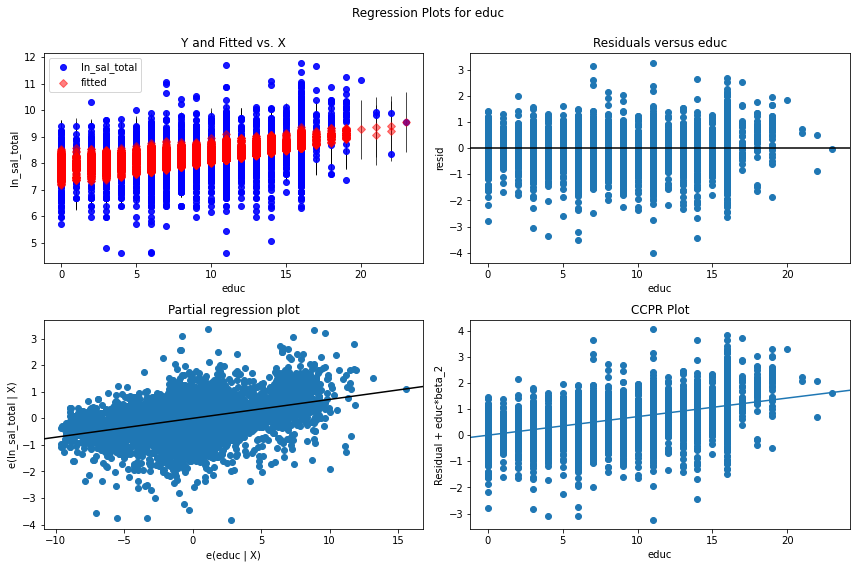

In [112]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'educ', fig=fig)

Another important assumption is HOMOSKEDASTICITY, i.e., **that the variance of the error term is constant and doesn't change as the values of the explanatory variables change**. This is highly important because, if violated, it can produce inaccurate p-values, which may lead the researcher to affirm that the variable is significant, when it might not be.

In other words, given our model above, this would imply that the variance of the unobserved error _u_ does not depend on gender, education and experience. Formally stated, this is:

$$ Var(u|sexo, educ, exper, expersq) = {\sigma}^2 $$

A visual way to test for homoscedasticity is plotting the residuals vs fitted values. As the graph below shows, the residuals are completely independent from the fitted values; in fact, the former doesn't show any signs of increasing as the fitted values increase, which shows that there is no clear pattern. In addition, that red line (which is usually better when it's COMPLETELY horizontal) confirms that the residuals oscillate around the zero line. In conclusion, the model is homoskedatic, which means that the variance of the error term is constant.

<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

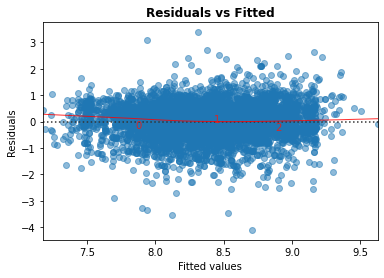

In [111]:
cls = Linear_Reg_Diagnostic(model)
cls.residual_plot()